In [203]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-rent-prediction/Rent.xlsx


In [204]:
#Imported xlsx file
db = pd.read_excel('/kaggle/input/house-rent-prediction/Rent.xlsx')

We will start with a data overview and data cleaning

In [205]:
db.head()

,area,rent
0,2000.0,31500.0
1,2100.0,35000.0
2,2500.0,41050.0
3,2250.0,36100.0
4,3000.0,52100.0


In [206]:
db.tail()

,area,rent
55,3100.0,54000.0
56,2750.0,48500.0
57,1800.0,25100.0
58,2200.0,31560.0
59,3100.0,51600.0


In [207]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    60 non-null     float64
 1   rent    60 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [208]:
db.shape

(60, 2)

#### Conclusion of initial data overview
Our dataset contains 60 rows & 2 columns. 
The columns are Area & Rent

## Now we will build some plots in order to overview data clearer

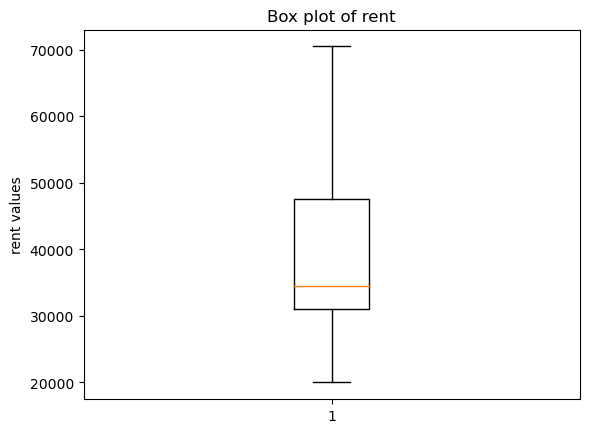

In [209]:
# create box plot
plt.boxplot(db['rent'])

# add title and labels
plt.title('Box plot of rent')
plt.ylabel('rent values')
plt.show()


Using boxplot we can clearly see a lot about the rent prices. Some of the main things that we could conclude is that about 20000 is the minimum price for the rent and about 70000 is the max price

## Since our data is clean, we don't have any artifacts we can now start on learning the model

In my opinion the best model that we can use here is the Linear Regression, since we have two numerical features and we have a linear relationship between the features and the target variable

In [210]:
# Split data into features and target variable
X = df['area'].values.reshape(-1, 1)  # Features
y = df['rent'].values  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model on the training data
modelLinear = LinearRegression()
modelLinear.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred_linear = modelLinear.predict(X_test)

In [211]:
# calculate mean squared error and mean aboslute error on test data
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

print("Mean absolute error: %d\nMean squared error: %d" % (mae_linear, mse_linear))

Mean absolute error: 1984
Mean squared error: 5199691


In [212]:
# Create and fit the model on the training data
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)


# Predict the target variable for the test data
y_pred_lasso = lasso.predict(X_test)

In [213]:
# calculate mean squared error and mean aboslute error on test data
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print("Mean absolute error: %d\nMean squared error: %d" % (mae_lasso, mse_lasso))

Mean absolute error: 1984
Mean squared error: 5199691


We are getting the same values for both models is that you are using only one feature area to predict the rent price, and both linear regression and Lasso regression with alpha=0.1 will produce the same results for this simple dataset. In more complex datasets, you may see different results between the two models.

